In [2]:
import numpy as np

point_cloud = np.load('./data/pn/data_pn/testCF2002_LR1.npy')
labels = np.load('./data/pn/label_pn/testCF2002_LR1.npy')

print("Point Cloud Shape:", point_cloud.shape)  # (N, 3)
print("Labels Shape:", labels.shape)  # (N,)

Point Cloud Shape: (17250, 3)
Labels Shape: (17250,)


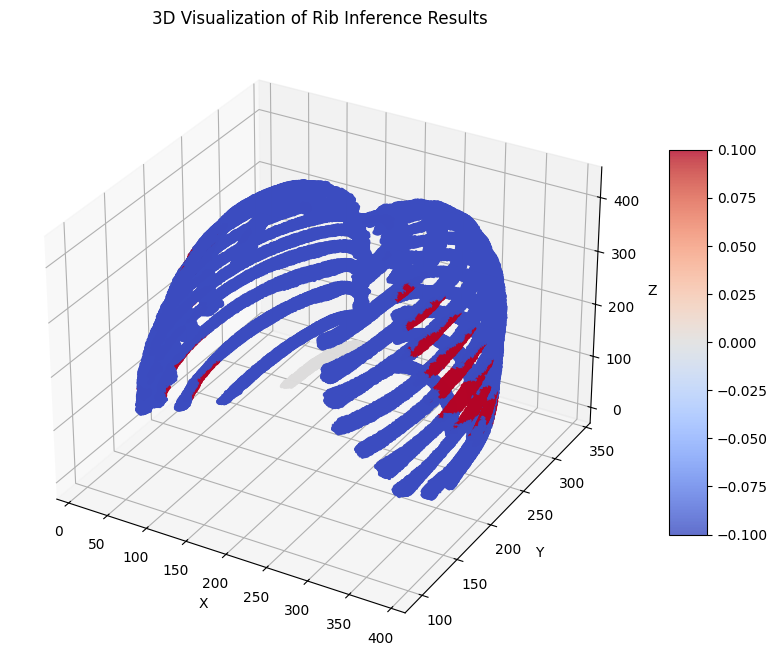

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os

point_folder = "./inference_res/point/"
label_folder = "./inference_res/label/"

rib_files = [
    "testCF2002_LR1.npy", "testCF2002_LR2.npy", "testCF2002_LR3.npy",
    "testCF2002_LR4.npy", "testCF2002_LR5.npy", "testCF2002_LR6.npy",
    "testCF2002_LR7.npy", "testCF2002_LR8.npy", "testCF2002_LR9.npy",
    "testCF2002_LR10.npy", "testCF2002_LR11.npy", "testCF2002_LR12.npy",
    "testCF2002_RR1.npy", "testCF2002_RR2.npy", "testCF2002_RR3.npy",
    "testCF2002_RR4.npy", "testCF2002_RR5.npy", "testCF2002_RR6.npy",
    "testCF2002_RR7.npy", "testCF2002_RR8.npy", "testCF2002_RR9.npy",
    "testCF2002_RR10.npy", "testCF2002_RR11.npy", "testCF2002_RR12.npy"
]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

for rib in rib_files:
    try:
        point_cloud = np.load(os.path.join(point_folder, rib))
        predictions = np.load(os.path.join(label_folder, rib[:-4] + ".npy"))

        scatter = ax.scatter(point_cloud[:, 0], point_cloud[:, 1], point_cloud[:, 2],
                             c=predictions, cmap='coolwarm', s=1, alpha=0.8)
    except Exception as e:
        print(f"Error loading {rib}: {e}")

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.colorbar(scatter, ax=ax, shrink=0.5, aspect=10)
plt.title("3D Visualization of Rib Inference Results")
plt.show()


In [4]:
predictions = np.load('./inference_res/label/testCF2002_LR1.npy')


print("Min:", predictions.min())
print("Max:", predictions.max())
print("Unique values:", np.unique(predictions))

Min: 0
Max: 1
Unique values: [0 1]


In [ ]:
import numpy as np
import nibabel as nib

def npy_to_nii(point_cloud, predictions, output_path, grid_size=(512, 512, 512)):

    volume = np.zeros(grid_size, dtype=np.uint8)

    for i, point in enumerate(point_cloud):
        x, y, z = map(int, np.round(point))
        if 0 <= x < grid_size[0] and 0 <= y < grid_size[1] and 0 <= z < grid_size[2]:
            volume[x, y, z] = predictions[i]

    nii = nib.Nifti1Image(volume, np.eye(4))
    nib.save(nii, output_path)
    print(f"Saved nii.gz to {output_path}")



In [ ]:
import numpy as np
import open3d as o3d

def npy_to_stl(point_cloud, predictions, output_path):

    target_points = point_cloud[predictions == 1]

    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(target_points)

    mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_alpha_shape(pcd, alpha=0.1)

    o3d.io.write_triangle_mesh(output_path, mesh)
    print(f"Saved STL to {output_path}")


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [ ]:
import os

point_folder = './inference_res/point/'
label_folder = './inference_res/label/'
nii_output_folder = './inference_res/nii/'
stl_output_folder = './inference_res/stl/'

os.makedirs(nii_output_folder, exist_ok=True)
os.makedirs(stl_output_folder, exist_ok=True)

rib_files = [
    "testCF2002_LR1.npy", "testCF2002_LR2.npy", "testCF2002_LR3.npy",
    "testCF2002_LR4.npy", "testCF2002_LR5.npy", "testCF2002_LR6.npy",
    "testCF2002_LR7.npy", "testCF2002_LR8.npy", "testCF2002_LR9.npy",
    "testCF2002_LR10.npy", "testCF2002_LR11.npy", "testCF2002_LR12.npy",
    "testCF2002_RR1.npy", "testCF2002_RR2.npy", "testCF2002_RR3.npy",
    "testCF2002_RR4.npy", "testCF2002_RR5.npy", "testCF2002_RR6.npy",
    "testCF2002_RR7.npy", "testCF2002_RR8.npy", "testCF2002_RR9.npy",
    "testCF2002_RR10.npy", "testCF2002_RR11.npy", "testCF2002_RR12.npy"
]

for rib in rib_files:
    point_path = os.path.join(point_folder, rib)
    label_path = os.path.join(label_folder, rib[:-4] + ".npy")

    point_cloud = np.load(point_path)
    predictions = np.load(label_path)

    nii_output_path = os.path.join(nii_output_folder, rib[:-4] + ".nii.gz")
    npy_to_nii(point_cloud, predictions, nii_output_path)

    stl_output_path = os.path.join(stl_output_folder, rib[:-4] + ".stl")
    npy_to_stl(point_cloud, predictions, stl_output_path)


Saved nii.gz to ./inference_res/nii/testCF2002_LR1.nii.gz
[Open3D WARNING] [CreateFromPointCloudAlphaShape] invalid tetra in TetraMesh
[Open3D WARNING] [CreateFromPointCloudAlphaShape] invalid tetra in TetraMesh
[Open3D WARNING] [CreateFromPointCloudAlphaShape] invalid tetra in TetraMesh
[Open3D WARNING] [CreateFromPointCloudAlphaShape] invalid tetra in TetraMesh
[Open3D WARNING] [CreateFromPointCloudAlphaShape] invalid tetra in TetraMesh
[Open3D WARNING] [CreateFromPointCloudAlphaShape] invalid tetra in TetraMesh
[Open3D WARNING] [CreateFromPointCloudAlphaShape] invalid tetra in TetraMesh
[Open3D WARNING] [CreateFromPointCloudAlphaShape] invalid tetra in TetraMesh
[Open3D WARNING] [CreateFromPointCloudAlphaShape] invalid tetra in TetraMesh
[Open3D WARNING] [CreateFromPointCloudAlphaShape] invalid tetra in TetraMesh
[Open3D WARNING] [CreateFromPointCloudAlphaShape] invalid tetra in TetraMesh
[Open3D WARNING] [CreateFromPointCloudAlphaShape] invalid tetra in TetraMesh
[Open3D WARNING] [

RuntimeError: [Open3D Error] (class std::tuple<class std::shared_ptr<class open3d::geometry::TetraMesh>,class std::vector<unsigned __int64,class std::allocator<unsigned __int64> > > __cdecl open3d::geometry::Qhull::ComputeDelaunayTetrahedralization(const class std::vector<class Eigen::Matrix<double,3,1,0,3,1>,class std::allocator<class Eigen::Matrix<double,3,1,0,3,1> > > &)) D:\a\Open3D\Open3D\cpp\open3d\geometry\Qhull.cpp:115: Not enough points to create a tetrahedral mesh.
